In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset_list = ['PCR', 'digits', 'COIL-20', 'F-MNIST']
df_list = []
for i in dataset_list:
    df = pd.read_csv(f'{i}/{i}.csv', index_col=0)
    df['dataset'] = i
    df_list.append(df)
df = pd.concat(df_list, ignore_index=True)

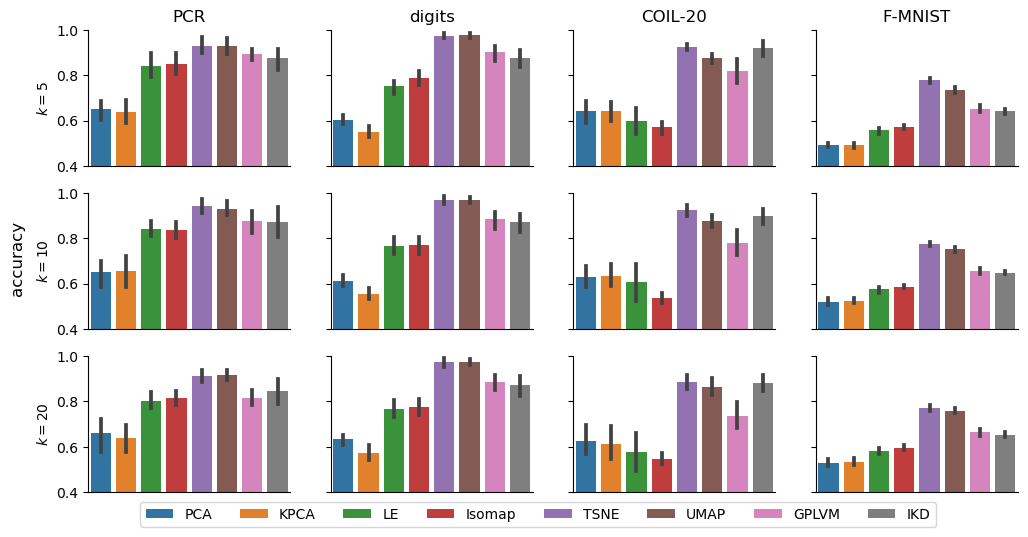

In [17]:
ax = sns.barplot(data=df[np.bitwise_and(df.dataset == dataset, df.k == [5, 10, 20][i])], x='method', y='accuracy', hue='method')
handles, labels = ax.get_legend_handles_labels()
plt.close()
fig, axs = plt.subplots(3, 4, figsize=(12, 6), sharex=True, sharey=True)
for i in range(3):
    for j in range(4):
        dataset = dataset_list[j]
        ax = sns.barplot(data=df[np.bitwise_and(df.dataset == dataset, df.k == [5, 10, 20][i])], x='method', y='accuracy', ax=axs[i, j])
        ax.set(ylim=[0.4, 1])
        ax.legend([],[], frameon=False)
        ax.set(xlabel=None, ylabel=None)
        ax.set_xticks([], [])
        if i == 0:
            ax.set_title(dataset)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if j == 0:
            ax.set(ylabel=f'$k={[5, 10, 20][i]}$')
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.04), ncol=8)
fig.supylabel('accuracy', x=0.06)
fig.savefig('real_world.pdf', bbox_inches='tight')

In [ ]:
df_knn = pd.DataFrame(columns=['accuracy', 'time', 'dataset', 'method', 'd_latent', 'k', 'fold'])
k_list = [5, 10, 20]

for method in method_list:
    for d_latent in d_latent_list:
        z = df_z[(z.method == method) & (z.d_latent == d_latent)]
        for k in k_list:
            clf = KNeighborsClassifier(n_neighbors=k)
            scores = cross_val_score(clf, z, y, cv=5)
            for i in range(5):
                df.loc[len(df)] = [scores[i], method, d_latent, k, i]

df.to_csv('knn.csv')

In [33]:
k = 20
dataset_list = df.dataset.unique()
method_list = df.method.unique()

def leading0(x):
    return f'{x:.2f}'.lstrip('0')

print('dataset', end='')
for j in range(8):
    print(f' & {method_list[j]}', end='')
print('\\\\')
for i in range(len(dataset_list)):
    print(f'{dataset_list[i]}', end='')
    for j in range(8):
        temp = df.loc[(df.k == k) & (df.method == method_list[j]) & (df.dataset == dataset_list[i])]
        print(f' & {leading0(temp.accuracy.mean())}\\scriptsize{{$\pm${leading0(temp.accuracy.std())}}}', end='')
        if j == 7:
            print('\\\\')

dataset & PCA & KPCA & LE & Isomap & TSNE & UMAP & GPLVM & IKD\\
PCR & .66\scriptsize{$\pm$.09} & .64\scriptsize{$\pm$.08} & .80\scriptsize{$\pm$.05} & .81\scriptsize{$\pm$.04} & .91\scriptsize{$\pm$.03} & .92\scriptsize{$\pm$.03} & .81\scriptsize{$\pm$.04} & .84\scriptsize{$\pm$.07}\\
digits & .63\scriptsize{$\pm$.03} & .57\scriptsize{$\pm$.04} & .77\scriptsize{$\pm$.05} & .78\scriptsize{$\pm$.04} & .97\scriptsize{$\pm$.03} & .97\scriptsize{$\pm$.02} & .88\scriptsize{$\pm$.05} & .87\scriptsize{$\pm$.06}\\
COIL-20 & .62\scriptsize{$\pm$.08} & .61\scriptsize{$\pm$.10} & .57\scriptsize{$\pm$.12} & .55\scriptsize{$\pm$.03} & .88\scriptsize{$\pm$.04} & .86\scriptsize{$\pm$.05} & .74\scriptsize{$\pm$.07} & .88\scriptsize{$\pm$.05}\\
F-MNIST & .53\scriptsize{$\pm$.02} & .53\scriptsize{$\pm$.02} & .58\scriptsize{$\pm$.02} & .60\scriptsize{$\pm$.01} & .77\scriptsize{$\pm$.02} & .76\scriptsize{$\pm$.01} & .67\scriptsize{$\pm$.02} & .65\scriptsize{$\pm$.01}\\
